In [4]:
import math
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.image import imread
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

In [5]:
train_df = pd.read_csv('train.csv', index_col=0)
train_df.head()

,File_names,Target
Id,,
0,e184d851-45d7-50ff-85a9-9b75993484e7.jpeg,0
1,6e2c95c7-c0c2-565a-b3e2-d9de6eeb72ce.jpeg,1
2,2b7ca495-6101-5fe1-9c35-3a37e98a0cf2.jpeg,1
3,9d5fdc1a-22ac-5a4b-9942-694fa403765c.jpeg,1
4,786806b0-55cd-5aa3-a5d8-66701ffd77f7.jpeg,1


In [6]:
train_df['Target'].value_counts()

Target
1    3632
0    1345
Name: count, dtype: int64

In [7]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

In [8]:
path = 'Imagenes'

img_size = 224
batch_size = 32 # 64

In [9]:
train_generator = train_datagen.flow_from_directory(path, target_size=(img_size, img_size), batch_size=batch_size)

Found 4977 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'no': 0, 'yes': 1}

yes\bc9db865-b571-5e8a-a4d1-017ce4c0a30b.jpeg


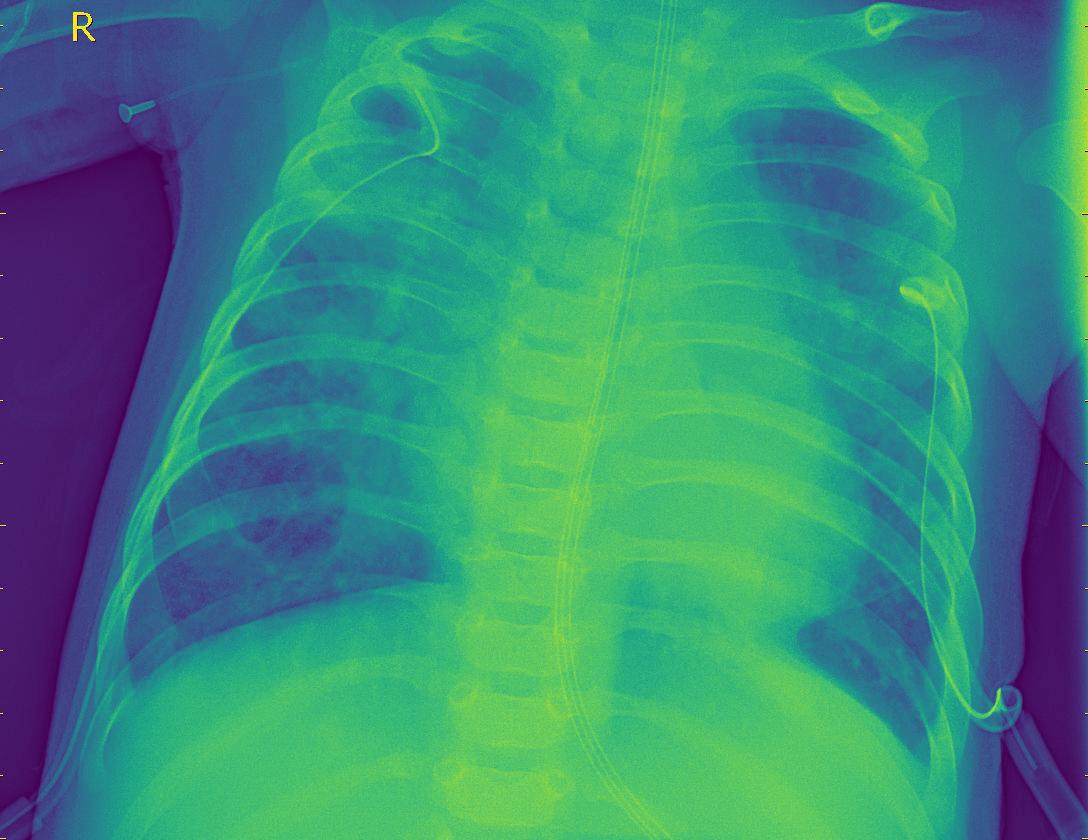

In [11]:
random_img = np.random.choice(train_generator.filenames)
print(random_img)
Image.open(path + '/' + random_img)

In [12]:
from tensorflow.keras.applications import DenseNet121

In [13]:
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3), pooling='avg')



In [14]:
base_model.trainable = False
base_model.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

In [15]:
cls_model = Sequential()

cls_model.add(Dense(512, activation='relu', input_shape=base_model.output_shape[1:]))
cls_model.add(Dense(train_generator.num_classes, activation='softmax'))

cls_model.compile(
    optimizer=Adam(0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
cls_model.summary()

c:\Users\jeffc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 525,826 (2.01 MB)

 Trainable params: 525,826 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
final_model_densenet = Sequential()
final_model_densenet.add(base_model)
final_model_densenet.add(cls_model)

final_model_densenet.compile(
    optimizer=Adam(0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

final_model_densenet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ ?                      │       525,826 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,563,330 (28.85 MB)

 Trainable params: 525,826 (2.01 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [17]:
train_generator2 = train_datagen.flow_from_directory(
    path, target_size=(img_size, img_size), batch_size=batch_size, shuffle=False
)

Found 4977 images belonging to 2 classes.


In [18]:
n_batches = math.ceil(train_generator2.samples / batch_size)
n_batches

156

In [20]:
train_generator2.reset()

# Variables donde vamos a guardar los features extraidos
outputs_x = []
outputs_y = []

for i in tqdm(range(n_batches)):
    x, y = next(train_generator2)
    outputs_x.append(base_model.predict_on_batch(x)) #base_model_resnet.predict(x)
    outputs_y.append(y)

outputs_x = np.concatenate(outputs_x)
outputs_y = np.concatenate(outputs_y)

100%|██████████| 156/156 [04:42<00:00,  1.81s/it]


In [21]:
# Guardamos los arrays
np.savez_compressed('Imagenes/no_yes_precomputed_densenet', x=outputs_x, y=outputs_y)

In [47]:
train_generator2.reset()

# Variables donde vamos a guardar los features extraidos
outputs_x = []
outputs_y = []

for i in tqdm(range(n_batches)):
    x, y = next(train_generator2)
    outputs_x.append(base_model.predict(x)) #base_model_resnet.predict(x)
    outputs_y.append(y)

outputs_x = np.concatenate(outputs_x)
outputs_y = np.concatenate(outputs_y)

  0%|          | 0/156 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


  1%|          | 1/156 [00:05<14:09,  5.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  1%|▏         | 2/156 [00:07<09:27,  3.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  2%|▏         | 3/156 [00:10<07:35,  2.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 4/156 [00:12<06:37,  2.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 5/156 [00:14<06:06,  2.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▍         | 6/156 [00:16<05:41,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▍         | 7/156 [00:18<05:26,  2.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  5%|▌         | 8/156 [00:20<05:11,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  6%|▌         | 9/156 [00:22<05:12,  2.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  6%|▋         | 10/156 [00:24<05:10,  2.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  7%|▋         | 11/156 [00:26<05:01,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  8%|▊         | 12/156 [00:28<04:58,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  8%|▊         | 13/156 [00:30<04:55,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  9%|▉         | 14/156 [00:32<04:52,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 10%|▉         | 15/156 [00:34<04:52,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 10%|█         | 16/156 [00:36<04:49,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 11%|█         | 17/156 [00:38<04:48,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 12%|█▏        | 18/156 [00:40<04:43,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 12%|█▏        | 19/156 [00:42<04:38,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 13%|█▎        | 20/156 [00:44<04:35,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 13%|█▎        | 21/156 [00:46<04:29,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 14%|█▍        | 22/156 [00:48<04:26,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 15%|█▍        | 23/156 [00:50<04:23,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 15%|█▌        | 24/156 [00:52<04:22,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 16%|█▌        | 25/156 [00:54<04:34,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 17%|█▋        | 26/156 [00:57<04:30,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 17%|█▋        | 27/156 [00:59<04:27,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 18%|█▊        | 28/156 [01:01<04:20,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 19%|█▊        | 29/156 [01:03<04:16,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 19%|█▉        | 30/156 [01:05<04:13,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 20%|█▉        | 31/156 [01:07<04:14,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 21%|██        | 32/156 [01:09<04:15,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 21%|██        | 33/156 [01:11<04:15,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 22%|██▏       | 34/156 [01:13<04:14,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 22%|██▏       | 35/156 [01:15<04:11,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 23%|██▎       | 36/156 [01:17<04:03,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 24%|██▎       | 37/156 [01:19<03:57,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 24%|██▍       | 38/156 [01:21<04:01,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 25%|██▌       | 39/156 [01:23<03:54,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 26%|██▌       | 40/156 [01:25<03:57,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 26%|██▋       | 41/156 [01:27<03:56,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 27%|██▋       | 42/156 [01:29<03:54,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 28%|██▊       | 43/156 [01:31<03:45,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 28%|██▊       | 44/156 [01:33<03:40,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 29%|██▉       | 45/156 [01:35<03:42,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 29%|██▉       | 46/156 [01:37<03:40,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 30%|███       | 47/156 [01:39<03:34,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 31%|███       | 48/156 [01:41<03:23,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 31%|███▏      | 49/156 [01:42<03:18,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 32%|███▏      | 50/156 [01:44<03:12,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 33%|███▎      | 51/156 [01:46<03:08,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 33%|███▎      | 52/156 [01:48<03:10,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 34%|███▍      | 53/156 [01:50<03:12,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 35%|███▍      | 54/156 [01:52<03:11,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 35%|███▌      | 55/156 [01:54<03:20,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 36%|███▌      | 56/156 [01:56<03:13,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 37%|███▋      | 57/156 [01:58<03:07,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 37%|███▋      | 58/156 [01:59<03:05,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 38%|███▊      | 59/156 [02:01<03:00,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 38%|███▊      | 60/156 [02:03<03:00,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 39%|███▉      | 61/156 [02:05<02:57,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 40%|███▉      | 62/156 [02:07<02:55,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 40%|████      | 63/156 [02:09<02:51,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 41%|████      | 64/156 [02:10<02:50,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 42%|████▏     | 65/156 [02:12<02:52,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 42%|████▏     | 66/156 [02:15<02:54,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 43%|████▎     | 67/156 [02:17<02:56,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 44%|████▎     | 68/156 [02:18<02:51,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 44%|████▍     | 69/156 [02:20<02:44,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 45%|████▍     | 70/156 [02:22<02:40,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 46%|████▌     | 71/156 [02:24<02:37,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 46%|████▌     | 72/156 [02:26<02:34,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 47%|████▋     | 73/156 [02:28<02:34,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 47%|████▋     | 74/156 [02:29<02:31,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 48%|████▊     | 75/156 [02:31<02:31,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 49%|████▊     | 76/156 [02:33<02:31,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 49%|████▉     | 77/156 [02:35<02:26,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 78/156 [02:37<02:21,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 51%|█████     | 79/156 [02:38<02:17,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 51%|█████▏    | 80/156 [02:40<02:15,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 52%|█████▏    | 81/156 [02:42<02:18,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 53%|█████▎    | 82/156 [02:44<02:18,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 53%|█████▎    | 83/156 [02:46<02:17,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 54%|█████▍    | 84/156 [02:48<02:15,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 54%|█████▍    | 85/156 [02:50<02:12,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 55%|█████▌    | 86/156 [02:52<02:11,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 56%|█████▌    | 87/156 [02:54<02:10,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 56%|█████▋    | 88/156 [02:56<02:09,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 57%|█████▋    | 89/156 [02:57<02:07,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 58%|█████▊    | 90/156 [02:59<02:04,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 58%|█████▊    | 91/156 [03:01<02:00,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 59%|█████▉    | 92/156 [03:03<01:59,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 60%|█████▉    | 93/156 [03:05<01:57,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 60%|██████    | 94/156 [03:07<01:56,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 61%|██████    | 95/156 [03:09<01:58,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 62%|██████▏   | 96/156 [03:11<01:53,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 62%|██████▏   | 97/156 [03:12<01:48,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 63%|██████▎   | 98/156 [03:14<01:44,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 63%|██████▎   | 99/156 [03:16<01:42,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 64%|██████▍   | 100/156 [03:18<01:41,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 65%|██████▍   | 101/156 [03:20<01:41,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 65%|██████▌   | 102/156 [03:22<01:41,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 66%|██████▌   | 103/156 [03:23<01:36,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 67%|██████▋   | 104/156 [03:25<01:33,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 105/156 [03:27<01:29,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 68%|██████▊   | 106/156 [03:29<01:30,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 69%|██████▊   | 107/156 [03:30<01:28,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 69%|██████▉   | 108/156 [03:32<01:27,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 70%|██████▉   | 109/156 [03:34<01:25,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 110/156 [03:36<01:22,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 71%|███████   | 111/156 [03:38<01:21,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 72%|███████▏  | 112/156 [03:39<01:20,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 72%|███████▏  | 113/156 [03:41<01:18,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 73%|███████▎  | 114/156 [03:43<01:16,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 74%|███████▎  | 115/156 [03:45<01:15,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 74%|███████▍  | 116/156 [03:47<01:13,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 75%|███████▌  | 117/156 [03:49<01:11,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 76%|███████▌  | 118/156 [03:51<01:09,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 76%|███████▋  | 119/156 [03:52<01:08,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 77%|███████▋  | 120/156 [03:54<01:05,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 78%|███████▊  | 121/156 [03:56<01:03,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 78%|███████▊  | 122/156 [03:58<01:01,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 79%|███████▉  | 123/156 [03:59<00:59,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 79%|███████▉  | 124/156 [04:01<00:57,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 80%|████████  | 125/156 [04:03<00:55,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 81%|████████  | 126/156 [04:05<00:53,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 81%|████████▏ | 127/156 [04:07<00:52,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 82%|████████▏ | 128/156 [04:09<00:51,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 83%|████████▎ | 129/156 [04:10<00:48,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 83%|████████▎ | 130/156 [04:12<00:46,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 84%|████████▍ | 131/156 [04:14<00:44,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 85%|████████▍ | 132/156 [04:16<00:43,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 85%|████████▌ | 133/156 [04:17<00:41,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 86%|████████▌ | 134/156 [04:19<00:39,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 87%|████████▋ | 135/156 [04:21<00:37,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 87%|████████▋ | 136/156 [04:23<00:37,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 88%|████████▊ | 137/156 [04:25<00:36,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 88%|████████▊ | 138/156 [04:27<00:34,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 89%|████████▉ | 139/156 [04:29<00:33,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 90%|████████▉ | 140/156 [04:31<00:33,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 90%|█████████ | 141/156 [04:34<00:32,  2.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 91%|█████████ | 142/156 [04:36<00:30,  2.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 92%|█████████▏| 143/156 [04:38<00:28,  2.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 92%|█████████▏| 144/156 [04:40<00:25,  2.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 93%|█████████▎| 145/156 [04:43<00:24,  2.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 94%|█████████▎| 146/156 [04:45<00:22,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 94%|█████████▍| 147/156 [04:47<00:20,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 95%|█████████▍| 148/156 [04:49<00:17,  2.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 96%|█████████▌| 149/156 [04:51<00:15,  2.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 96%|█████████▌| 150/156 [04:54<00:13,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 97%|█████████▋| 151/156 [04:56<00:11,  2.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 97%|█████████▋| 152/156 [04:58<00:08,  2.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 98%|█████████▊| 153/156 [05:00<00:06,  2.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 99%|█████████▊| 154/156 [05:02<00:04,  2.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 99%|█████████▉| 155/156 [05:05<00:02,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


100%|██████████| 156/156 [05:10<00:00,  1.99s/it]


In [48]:
# Guardamos los arrays
np.savez_compressed('Imagenes/no_yes_precomputed_densenet_V2', x=outputs_x, y=outputs_y)

In [22]:
# Cargar arrays
data = np.load('Imagenes/no_yes_precomputed_densenet.npz')
outputs_x = data['x']
outputs_y = data['y']

outputs_x.shape, outputs_y.shape

((4977, 1024), (4977, 2))

In [23]:
outputs_x.shape

(4977, 1024)

In [24]:
log = cls_model.fit(
    outputs_x, outputs_y,
    epochs=10,
    batch_size=batch_size,
    #validation_split=0.2
)

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7954 - loss: 3.7516
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8933 - loss: 0.4011
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9120 - loss: 0.2559
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8938 - loss: 0.4155
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9180 - loss: 0.2619
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9417 - loss: 0.1595
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9099 - loss: 0.3147
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9338 - loss: 0.1916
Epoch 9/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9521 - loss: 0.1353
Epoch 10/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9332 - loss: 0.1890


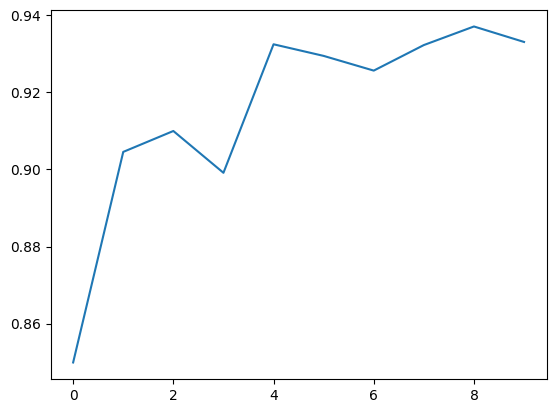

In [25]:
# Show the learning curves
plt.plot(log.history['accuracy'], label='accuracy')

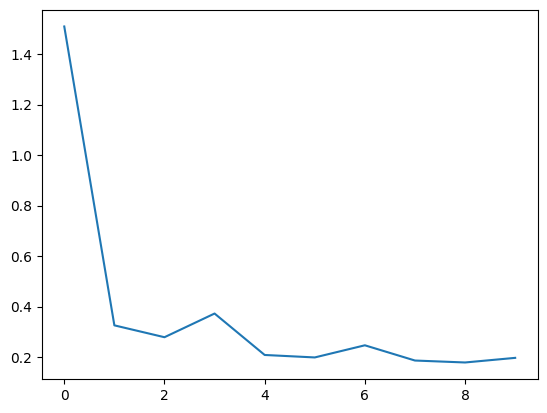

In [26]:
# Show loss
plt.plot(log.history['loss'], label='loss')

In [44]:
lbl_dict = {v: k for k, v in train_generator.class_indices.items()}

def get_class(img_path):
    print(f'Procesando imagen: {img_path}')

    # Cargar la imagen del path
    img = Image.open(img_path).convert('RGB')

    # Resize
    img_resized = img.resize((img_size, img_size))

    # Convertir a array
    x = np.asarray(img_resized, np.float32)[None]
    x = preprocess_input(x)

    # Obtener predicciones
    y = final_model_densenet.predict(x)

    print(f'Predicciones: {y}')

    # Decodear las predicciones
    pred = lbl_dict[np.argmax(y)]

    print(f'Predicción: {pred}')

    return pred

In [49]:
# Cargar arrays
data = np.load('Imagenes/no_yes_precomputed_densenet_V2.npz')
outputs_x = data['x']
outputs_y = data['y']

log = cls_model.fit(
    outputs_x, outputs_y,
    epochs=10,
    batch_size=batch_size,
)

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9388 - loss: 0.1682
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9482 - loss: 0.1413
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9521 - loss: 0.1274
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9351 - loss: 0.1731
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9425 - loss: 0.1487
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9538 - loss: 0.1274
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9536 - loss: 0.1380
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9386 - loss: 0.1504
Epoch 9/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9649 - loss: 0.1072
Epoch 10/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9470 - loss: 0.1407


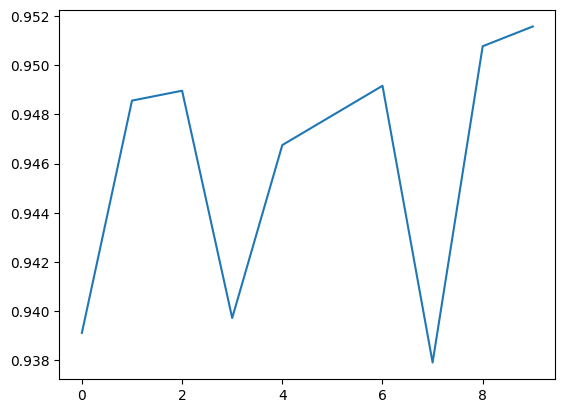

In [54]:
# Show the learning curves
plt.plot(log.history['accuracy'], label='accuracy')

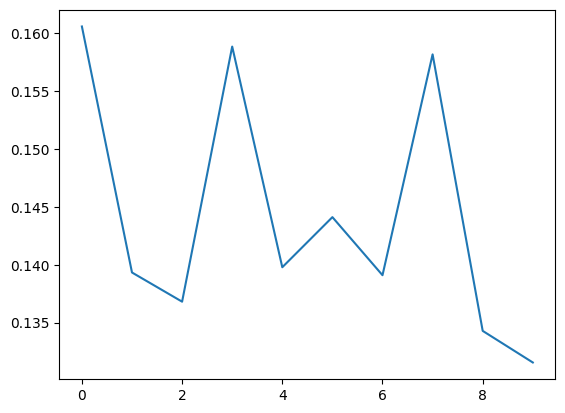

In [55]:
# Show loss
plt.plot(log.history['loss'], label='loss')